MODEL EVALUATION AND REFINEMENT

<h1>Table of content</h1>
<ul>
    <li>Model Evaluation </a></li>
    <li>Over-fitting, Under-fitting and Model Selection </a></li>
    <li>Ridge Regression </a></li>
    <li>Grid Search</a></li>
</ul>

In [2]:
import pandas as pd
import numpy as np

In [9]:
%%capture
! pip install ipywidgets

In [10]:
from IPython.display import display
from IPython.html import widgets 
from ipywidgets import interact, interactive, fixed, interact_manual

In [7]:
df=pd.read_csv('automobile(for Analysis).csv')
df=df._get_numeric_data()
df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,1,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,2,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,2,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [48]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [49]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

<h1 id="ref1">Part 1: Training and Testing</h1>

In [11]:
y_data = df['price']
x_data=df.drop('price',axis=1)   #drop price data in x data

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.25, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 51
number of training samples: 150


In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lre=LinearRegression()

In [19]:
lre.fit(x_train[['horsepower','engine-size','city-mpg']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
lre.score(x_test[['horsepower','engine-size','city-mpg']], y_test)

0.7154156281923972

In [21]:
lre.score(x_train[['horsepower','engine-size','city-mpg']], y_train)

0.8117135154088623

<h2>Cross-validation Score</h2>

In [ ]:
from sklearn.model_selection import cross_val_score

In [35]:
#not train or test data, all data is used to find score
Rcross = cross_val_score(lre, x_data[['horsepower','engine-size','city-mpg']], y_data, cv=4)

In [36]:
Rcross, Rcross.mean(), Rcross.std()

(array([0.84027397, 0.77381031, 0.74132967, 0.38224859]),
 0.6844156351697873,
 0.17806414317827204)

In [39]:
#The mean of the folds and the standard deviation
print("%0.2f(+/-%0.2f)" %(Rcross.mean(), Rcross.std()))

0.68(+/-0.18)


In [32]:
#We can use negative squared error as a score by setting the parameter  'scoring' metric to 'neg_mean_squared_error'. 
-1 * cross_val_score(lre,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')

array([20254142.84026704, 43745493.2650517 , 12539630.34014932,
       17561927.72247591])

In [37]:
from sklearn.model_selection import cross_val_predict

In [38]:
#not train or test data, all data is used to find yhat
yhat = cross_val_predict(lre,x_data[['horsepower']], y_data,cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

<h1 id="ref2">Part 2: Overfitting, Underfitting and Model Selection</h1>

<p>as test data out of sample data is a much better measure of how well your model performs in the real world. These differences are more apparent in Multiple Linear Regression and Polynomial Regression.</p>

In [41]:
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([18691.26919565,  5971.55129784, 11913.93328527,  7406.99925268,
        6665.90323124])

In [43]:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11476.88916858,  5995.01225232, 11347.45024298,  6869.00275689,
       15792.02354519])

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

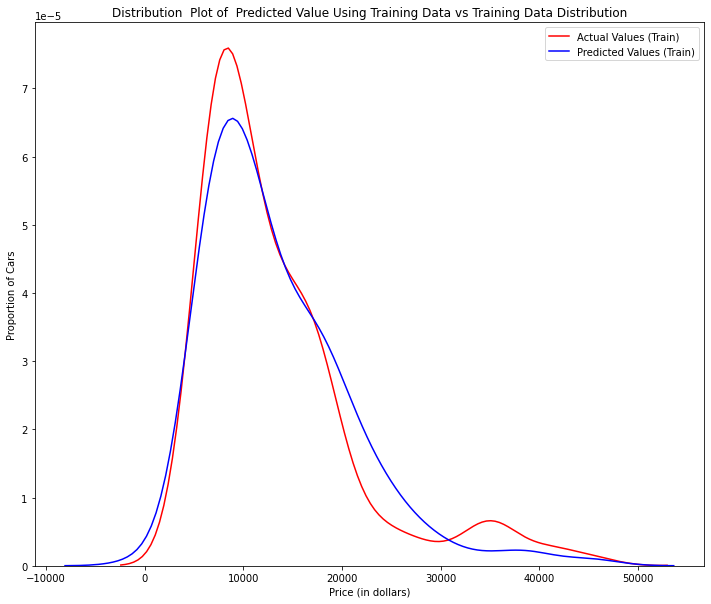

In [50]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

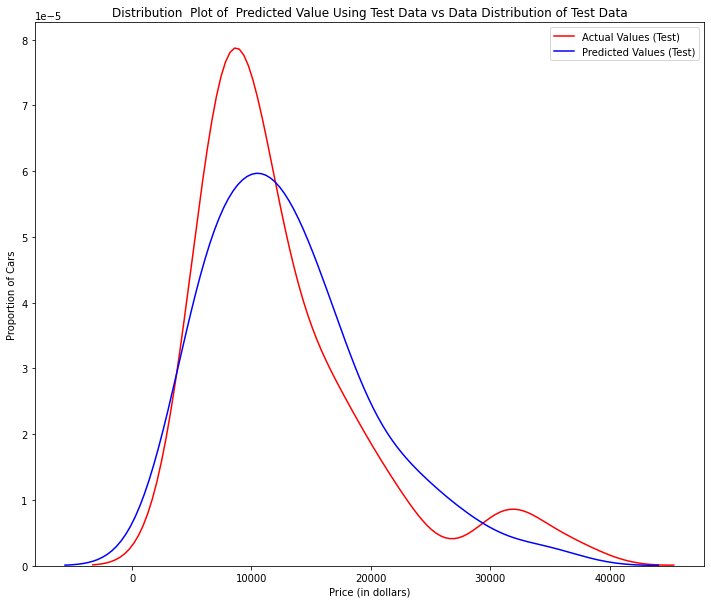

In [51]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

polynomial regression also exhibits a drop in the prediction accuracy when analysing the test dataset.

In [52]:
from sklearn.preprocessing import PolynomialFeatures

In [53]:
#%55 test data
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

In [54]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5, include_bias=True, interaction_only=False,
                   order='C')

In [66]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
yhat = poly.predict(x_test_pr)

In [68]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 6728.63702958  7307.96989706 12213.77721798 18893.28623041]
True values: [ 6295. 10698. 13860. 13499.]


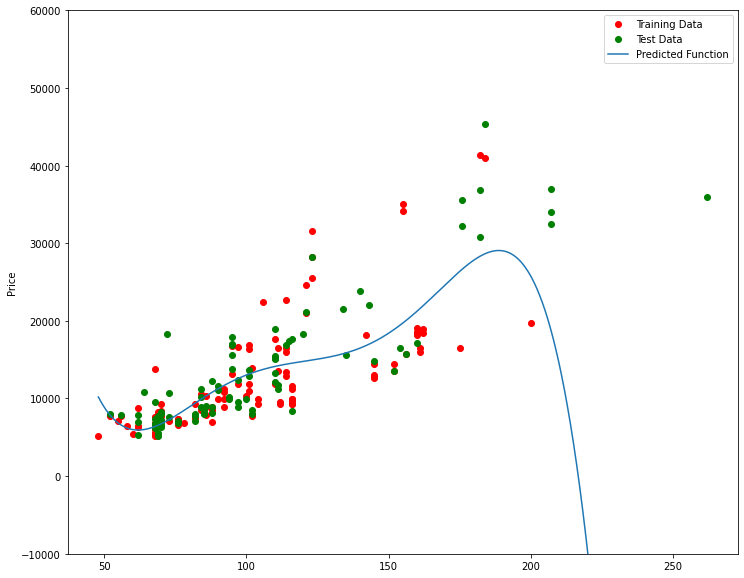

In [70]:
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)

In [71]:
poly.score(x_train_pr, y_train)

0.5567716901606526

In [72]:
poly.score(x_test_pr, y_test)

-29.871300058119818

how the R^2 changes on the test data for different order polynomials and plot the results:

Text(3, 0.75, 'Maximum R^2 ')

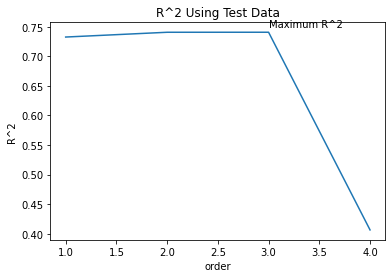

In [73]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

In [74]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

In [75]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

Example:

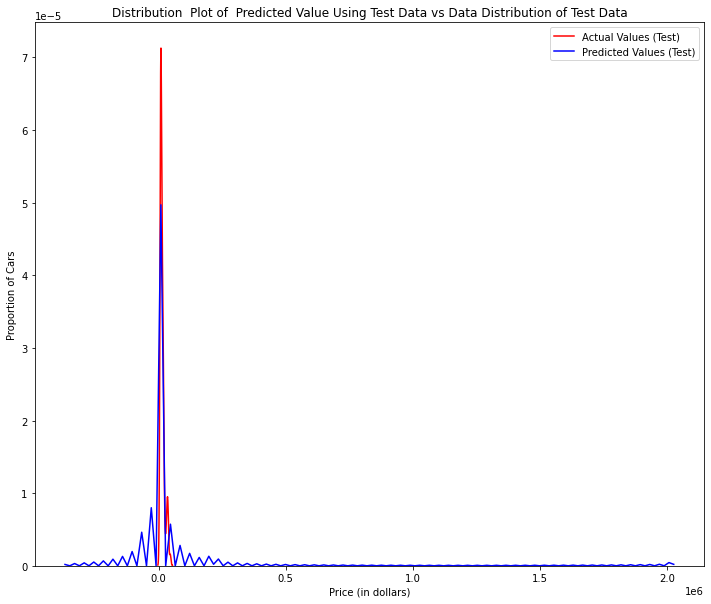

In [81]:
pr1=PolynomialFeatures(degree=2)
x_train_pr1=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
x_test_pr1=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
poly1=LinearRegression().fit(x_train_pr1,y_train)
yhat_test1=poly1.predict(x_test_pr1)
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test, yhat_test1, "Actual Values (Test)", "Predicted Values (Test)", Title)


In [85]:
poly1.score(x_train_pr1, y_train)

0.8778818679220798

In [83]:
poly1.score(x_test_pr1, y_test)

-621.381927438639

<h2 id="ref3">Part 3: Ridge regression</h2> 

 how the parameter Alfa changes the model. our test data will be used as validation data.

In [115]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [116]:
from sklearn.linear_model import Ridge

In [123]:
RigeModel=Ridge(alpha=0.1)

In [124]:
RigeModel.fit(x_train_pr, y_train)

C:\Users\fahri\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.02972e-16): result may not be accurate.
  overwrite_a=True).T


Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [127]:
RigeModel.score(x_test_pr, y_test)

0.5267273867511516

In [92]:
yhat = RigeModel.predict(x_test_pr)

In [95]:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6567.83081933  9597.97151399 20836.22326844 19347.69543464]
test set : [ 6295. 10698. 13860. 13499.]


In [96]:
Rsqu_test = []
Rsqu_train = []
dummy1 = []
ALFA = 10 * np.array(range(0,1000))
for alfa in ALFA:
    RigeModel = Ridge(alpha=alfa) 
    RigeModel.fit(x_train_pr, y_train)
    Rsqu_test.append(RigeModel.score(x_test_pr, y_test))
    Rsqu_train.append(RigeModel.score(x_train_pr, y_train))

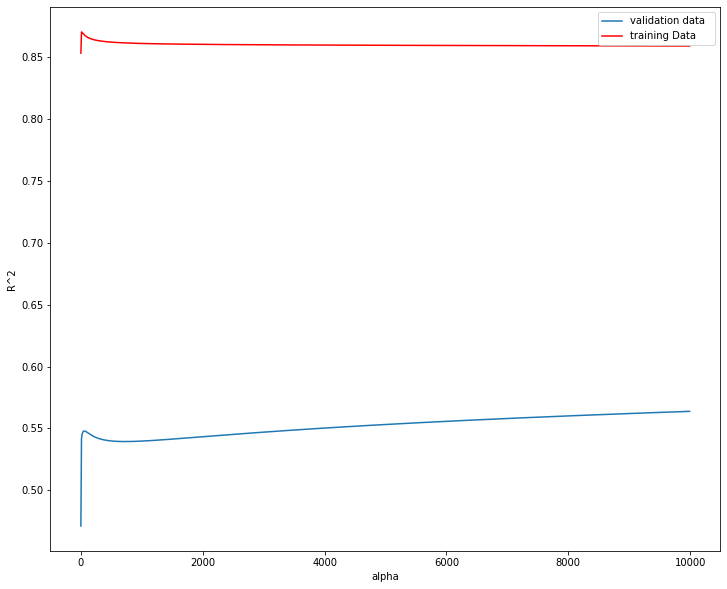

In [97]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(ALFA,Rsqu_test, label='validation data  ')
plt.plot(ALFA,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

Example:

In [129]:
RigeModel = Ridge(alpha=10) 
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr, y_test)

0.5418576440210929

In [148]:
features=['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']
pr=PolynomialFeatures(degree=2) 
x_train_pr=pr.fit_transform(x_train[features]) 
x_test_pr=pr.fit_transform(x_test[features])

RidgeModel_pr=Ridge(alpha=10)
RidgeModel_pr.fit(x_train_pr, y_train)
print(RidgeModel_pr.score(x_test_pr, y_test))

0.5418576440210929


In [143]:
RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_train[features], y_train)
RidgeModel.score(x_test[features], y_test)

0.7757732045544055

<h2 id="ref4">Part 4: Grid Search</h2>

The term Alfa is a hyperparameter, sklearn has the class  <b>GridSearchCV</b> to make the process of finding the best hyperparameter simpler.

In [101]:
from sklearn.model_selection import GridSearchCV

In [102]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [104]:
#ridge regions object:
RR=Ridge()
RR

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [105]:
#ridge grid search object 
Grid1 = GridSearchCV(RR, parameters1,cv=4)

In [107]:
#fit the model
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

C:\Users\fahri\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [108]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [109]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411649831036146

Example:

In [110]:
parameters2= [{'alpha': [0.001,0.1,1, 10, 100, 1000,10000,100000,100000],'normalize':[True,False]} ]
Grid2 = GridSearchCV(Ridge(), parameters2,cv=4)
Grid2.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']],y_data)
Grid2.best_estimator_

C:\Users\fahri\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)

In [114]:
Grid2.predict(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

array([13914.4366093 , 13914.4366093 , 18888.18332884, 10914.40348227,
       15914.61575227, 14200.42976878, 15643.32904271, 16114.30506684,
       17989.64946364, 11075.21354416, 11075.21354416, 17564.93045988,
       17800.41847195, 19149.31740352, 26351.86742392, 26994.10745682,
       27600.79739621,   240.72036592,  5476.07372376,  5625.92973144,
        5456.25329776,  5563.48816571,  9212.90872262,  5953.11378568,
        6047.3089905 ,  6047.3089905 ,  9482.64953644, 12016.34774594,
       18752.18686584,  3940.96221747,  5865.59298205,  4047.39146582,
        6526.64643252,  6595.15203603,  6826.35844788,  6886.30085095,
        9649.06962258,  9875.9944342 ,  9940.21843749, 10231.36725241,
       11557.33239074, 10663.72551585,  9898.32785268, 12784.01187112,
       33332.11540336, 33332.11540336, 42188.00559917,  5946.97619828,
        5739.5775086 ,  5760.98550969,  5932.24951847,  5953.65751956,
        8438.88364727,  8438.88364727,  8460.29164836, 11383.8352026 ,
      